In [1]:
import numpy as np
import pandas as pd

In [5]:
data = pd.read_excel("Medals.xlsx")

C:\Users\madri\AppData\Local\Programs\Python\Python39\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [6]:
data

,Rank,Team/NOC,Gold,Silver,Bronze,Total,Rank by Total
0,1,United States of America,39,41,33,113,1
1,2,People's Republic of China,38,32,18,88,2
2,3,Japan,27,14,17,58,5
3,4,Great Britain,22,21,22,65,4
4,5,ROC,20,28,23,71,3
...,...,...,...,...,...,...,...
88,86,Ghana,0,0,1,1,77
89,86,Grenada,0,0,1,1,77
90,86,Kuwait,0,0,1,1,77
91,86,Republic of Moldova,0,0,1,1,77


In [8]:
data_modified=data[['Gold','Silver','Bronze']]
data_modified.head()

,Gold,Silver,Bronze
0,39,41,33
1,38,32,18
2,27,14,17
3,22,21,22
4,20,28,23


In [12]:
data_modified=data_modified.sample(frac=1)
data_modified.head()

,Gold,Silver,Bronze
8,10,11,16
14,6,7,7
45,1,3,0
66,0,3,4
24,3,4,4


In [13]:
#split data 
data_train= data_modified[:60]
data_val=data_modified[60:80]
data_test=data_modified[80:]


In [39]:
X_train,Y_train=np.array(data_train)[:,:-1],np.array(data_train)[:,-1]
X_test,Y_test=np.array(data_test)[:,:-1],np.array(data_test)[:,-1]
X_val,Y_val=np.array(data_val)[:,:-1],np.array(data_val)[:,-1]
print(len(X_train.shape))
print(len(Y_train.shape))

2
1


In [20]:
#Xử lý đầu vào
from sklearn.preprocessing import MinMaxScaler
sacler = MinMaxScaler().fit(X_train)
X_train_scaler,X_val_scaler,X_test_scaler=sacler.transform(X_train),sacler.transform(X_val),sacler.transform(X_test)

array([[<AxesSubplot:title={'center':'0'}>,
        <AxesSubplot:title={'center':'1'}>]], dtype=object)

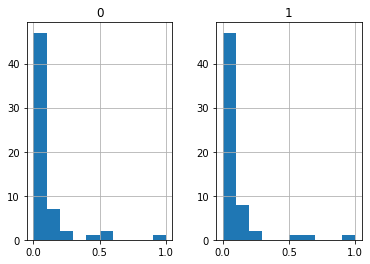

In [21]:
pd.DataFrame(X_train_scaler).hist()

In [22]:
from sklearn.metrics import mean_absolute_error
average_speed = Y_train.mean()
mean_absolute_error(Y_val,[average_speed]*len(Y_val))

4.42

In [23]:
from sklearn.linear_model import LinearRegression
model = LinearRegression().fit(X_train,Y_train)
mean_absolute_error(Y_val,model.predict(X_val))

2.7076315146745573

In [24]:
from sklearn.ensemble import RandomForestRegressor
random_forest =RandomForestRegressor().fit(X_train,Y_train)
mean_absolute_error(Y_val,random_forest.predict(X_val))

1.7496907634032635

In [53]:
from tensorflow.keras.layers import Input,Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
model1 = Sequential([Input(2,),Dense(32),Dense(32),Dense(1)])
model1.compile(loss='mse',optimizer=Adam(learning_rate=0.01),metrics=['mean_absolute_error'])
model1.fit(x=X_train,y=Y_train,epochs=16)

Epoch 1/16
2/2 [==============================] - 0s 3ms/step - loss: 54.3403 - mean_absolute_error: 4.4083
Epoch 2/16
2/2 [==============================] - 0s 2ms/step - loss: 11.1790 - mean_absolute_error: 2.2861
Epoch 3/16
2/2 [==============================] - 0s 3ms/step - loss: 67.8593 - mean_absolute_error: 3.9258
Epoch 4/16
2/2 [==============================] - 0s 2ms/step - loss: 28.5629 - mean_absolute_error: 2.8552
Epoch 5/16
2/2 [==============================] - 0s 2ms/step - loss: 13.2464 - mean_absolute_error: 2.1729
Epoch 6/16
2/2 [==============================] - 0s 3ms/step - loss: 18.2041 - mean_absolute_error: 2.6747
Epoch 7/16
2/2 [==============================] - 0s 3ms/step - loss: 24.2034 - mean_absolute_error: 3.0333
Epoch 8/16
2/2 [==============================] - 0s 2ms/step - loss: 24.1140 - mean_absolute_error: 2.9872
Epoch 9/16
2/2 [==============================] - 0s 2ms/step - loss: 17.0633 - mean_absolute_error: 2.5966
Epoch 10/16
2/2 [===========

In [50]:
model1.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_28 (Dense)            (None, 32)                96        
                                                                 
 dense_29 (Dense)            (None, 32)                1056      
                                                                 
 dense_30 (Dense)            (None, 1)                 33        
                                                                 
Total params: 1,185
Trainable params: 1,185
Non-trainable params: 0
_________________________________________________________________
